In [1]:
import pandas as pd

* Import data

In [2]:
all_teens = pd.read_csv('../data/clean/most_used_all_teens_clean.csv')

In [3]:
reach = pd.read_csv('../data/clean/reach_of_social_media_clean.csv')

* Change "none of the above" row to "other"

In [4]:
all_teens.at[4,'Platform']= 'Other'

* Rename columns

In [5]:
all_teens.columns = ['Platform', 'Usage of All Teens']

In [6]:
reach.columns = ['Platform', 'Reach of Platform']

In [7]:
all_teens

,Platform,Usage of All Teens
0,Snapchat,35.0
1,YouTube,32.0
2,Instagram,15.0
3,Facebook,10.0
4,Other,3.0
5,Twitter,3.0
6,Tumblr,1.0
7,Reddit,1.0


In [8]:
reach

,Platform,Reach of Platform
0,YouTube,81.4
1,Instagram,62.8
2,Facebook,59.9
3,Snapchat,52.6
4,Twitter,43.9
5,Pinterest,25.8
6,Reddit,25.1
7,Tumblr,17.5
8,LinkedIn,16.4
9,WhatsApp,11.8


* Add platforms that are missing

In [9]:
w_pinterest = all_teens.append({'Platform' : 'Pinterest' , 'Usage of All Teens' : 0} , ignore_index=True)

In [10]:
w_linkedin = w_pinterest.append({'Platform' : 'LinkedIn' , 'Usage of All Teens' : 0} , ignore_index=True)

In [11]:
w_whatsapp = w_linkedin.append({'Platform' : 'WhatsApp' , 'Usage of All Teens' : 0} , ignore_index=True)

In [12]:
all_platforms = w_whatsapp.append({'Platform' : 'Periscope' , 'Usage of All Teens' : 0} , ignore_index=True)

* Combine both dataframes

In [13]:
by_usage_and_reach = pd.merge(all_platforms, reach)

In [14]:
by_usage_and_reach

,Platform,Usage of All Teens,Reach of Platform
0,Snapchat,35.0,52.6
1,YouTube,32.0,81.4
2,Instagram,15.0,62.8
3,Facebook,10.0,59.9
4,Other,3.0,3.5
5,Twitter,3.0,43.9
6,Tumblr,1.0,17.5
7,Reddit,1.0,25.1
8,Pinterest,0.0,25.8
9,LinkedIn,0.0,16.4


In [15]:
import matplotlib.pyplot as plt

* Graph new dataframe

In [16]:
by_usage_and_reach.set_index("Platform",drop=True,inplace=True)

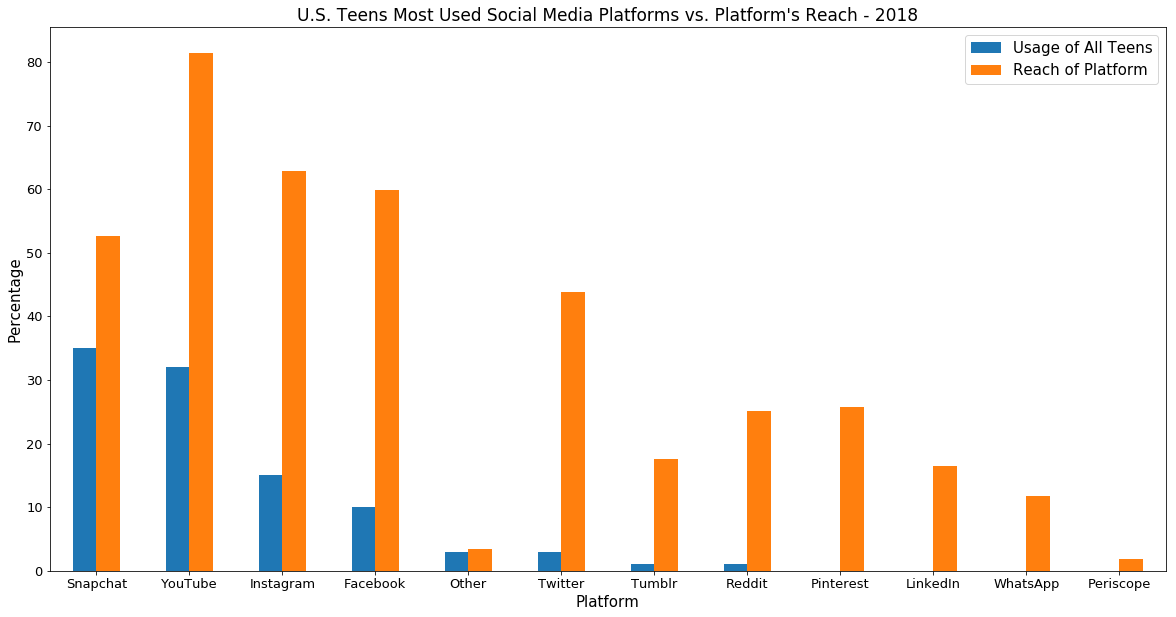

In [17]:
by_usage_and_reach.plot(kind='bar', figsize=(20,10), fontsize=13)
plt.title("U.S. Teens Most Used Social Media Platforms vs. Platform's Reach - 2018", fontsize=17)
plt.xlabel('Platform', fontsize=15)
plt.xticks(rotation='horizontal')
plt.ylabel('Percentage', fontsize=15)
plt.legend(fontsize=15)
plt.savefig('Teens_most_used_social_media_all_teens_vs_reach.png')